In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [47]:
df=pd.read_csv("dataset_2.csv")

In [48]:
points=df.iloc[:,1:4]
points=points.as_matrix()
print(len(df))

999


/home/akmohanty/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [49]:
x=points[:,0]
y=points[:,1]
print(x.shape)

(999,)


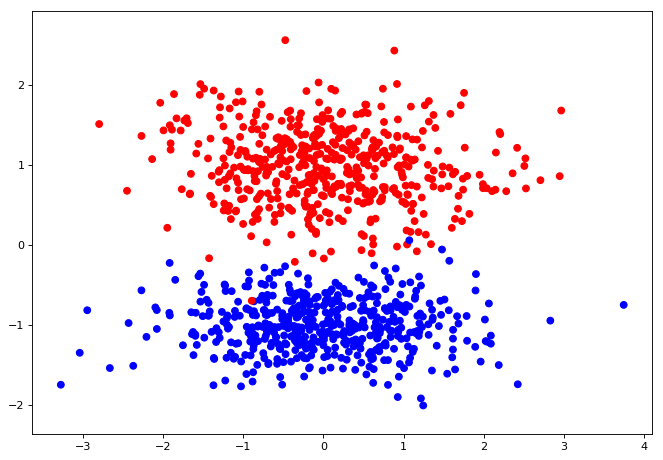

In [50]:
plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(points[:,0],points[:,1],c=points[:,2],cmap=plt.cm.bwr)
plt.axis('equal')
plt.show()

In [51]:

c1=points[points[:,2]==1] 
c1=c1[:, [0,1]]
m1=c1.mean(axis=0)
sub1=c1-m1
c2=points[points[:,2]==0]
c2=c2[:, [0,1]]
m2=c2.mean(axis=0)
sub2=c2-m2
mean=m2-m1


sub=points
sub[:,0]=sub[:,0]-mean[:0]



In [31]:
sw=np.matmul(sub1.T,sub1) + np.matmul(sub2.T,sub2)
sw=np.linalg.inv(sw)
w=np.matmul(sw,m2-m1)


In [32]:
project_1=c1[:, [0,1]]
project_2=c2[:, [0,1]]

In [33]:
project_1=np.matmul(w,c1.T)
project_2=np.matmul(w,c2.T)

In [34]:
slope=w[1]/w[0]

In [35]:
import math
angle=math.atan(slope)
sine=math.sin(angle)
cos=math.cos(angle)

In [36]:
x1=project_1*cos
y1=project_1*sine
x2=project_2*cos
y2=project_2*sine

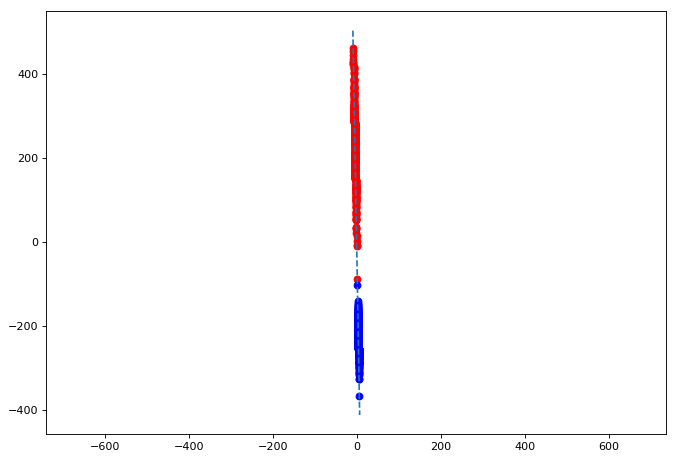

In [37]:
plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x1*10000,y1*10000,c='red')
plt.axis('equal')
plt.scatter(x2*10000,y2*10000,c='blue')
plt.axis('equal')
#plt.scatter(points[:,0],points[:,1],c=points[:,2],cmap=plt.cm.bwr)
plt.axis('equal')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 + slope * x_vals
plt.plot(x_vals, y_vals, '--')
plt.axis('equal')
plt.show()

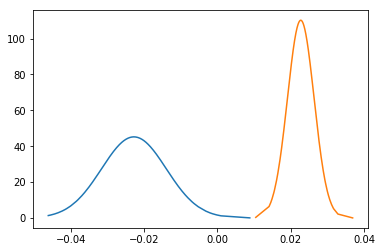

In [38]:
import scipy.stats as stats
project_1.sort()
project1_mean = np.mean(project_1)
project1_std = np.std(project_1)
pdf1 = stats.norm.pdf(project_1, project1_mean, project1_std)
plt.plot(project_1, pdf1) 

project_2.sort()
project2_mean = np.mean(project_2)
project2_std = np.std(project_2)
pdf2 = stats.norm.pdf(project_2, project2_mean, project2_std)
plt.plot(project_2, pdf2) 
plt.show()

In [39]:
def solve(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])

In [40]:
result=solve(project1_mean,project2_mean,project1_std,project2_std)
result

array([0.05491795, 0.00884518])

/home/akmohanty/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


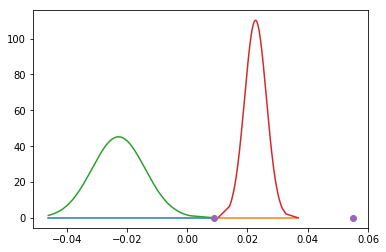

In [41]:
import matplotlib.mlab as mlab
plt.plot(project_1,project_1*0)
plt.plot(project_2,project_2*0)
plt.plot(project_1, pdf1)
plt.plot(project_2, pdf2)
plot3=plt.plot(result,mlab.normpdf(result,project1_mean,project1_std),'o')

In [42]:
for i in range(len(result)):
    if(((result[i]<project2_mean)and(result[i]>project1_mean))):
      #print(i,project1_mean,project2_mean)
        point=i
        break
    if((result[i]<project1_mean)and(result[i]>project2_mean)):
        point=i
        break
    print(result[i])


0.05491794728971108


In [43]:
print(result[point])

0.008845177857327916


project_x=point*cos

In [44]:
project_x=result[point]*cos
project_y=result[point]*sine

In [45]:
per=-1/slope
c=project_y-(per*project_x)

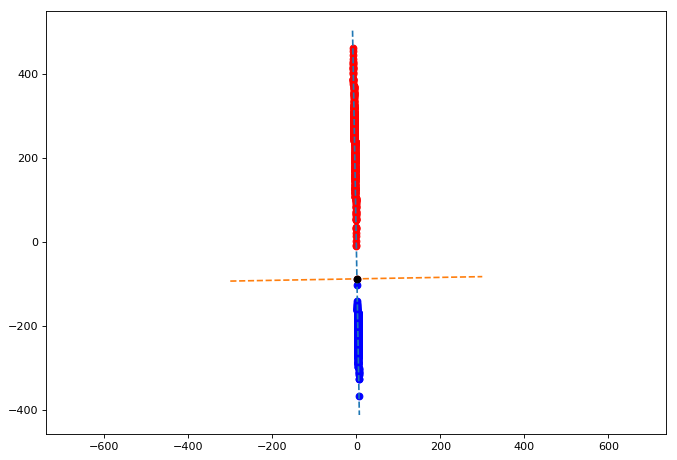

In [46]:
plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x1*10000,y1*10000,c='red')
plt.axis('equal')
plt.scatter(x2*10000,y2*10000,c='blue')
plt.axis('equal')
#plt.scatter(points[:,0],points[:,1],c=points[:,2],cmap=plt.cm.bwr)
x=np.linspace(-10,10,1000)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = slope * x_vals
plt.plot(x_vals, y_vals, '--')

plt.axis('equal')

perx_vals = np.linspace(-0.03,0.03,1000)
pery_vals = c + per * perx_vals
plt.plot(perx_vals*10000, pery_vals*10000, '--')

plt.axis('equal')
plt.plot(project_x*10000,project_y*10000,'o',c='black')
plt.axis('equal')
plt.show()
